In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [21]:
df = pd.read_csv(r'C:\Users\VARSHINI\Downloads\titanic.csv')
df


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [22]:
print("Rows and Columns:", df.shape)


Rows and Columns: (891, 12)


In [23]:
df.head()


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
df.isnull().sum()


passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [25]:
columns_to_drop = [
    "passenger_id", "name", "sib_sp",
    "parch", "ticket", "cabin", "embarked"
]

df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
df.head()


,p_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,NaN,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [26]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df.head()


,p_class,sex,age,fare,survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,NaN,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [27]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()


p_class     0
sex         0
age         0
fare        0
survived    0
dtype: int64

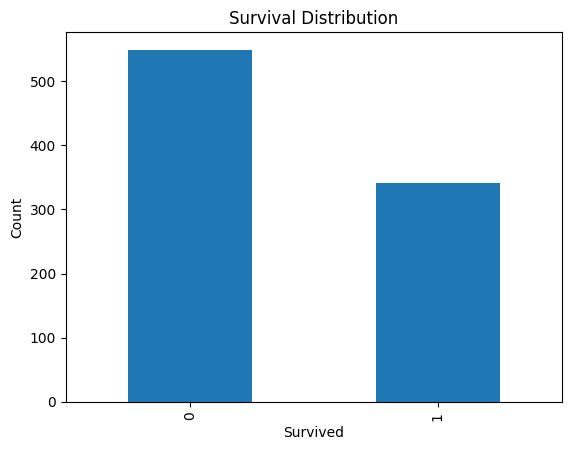

In [28]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


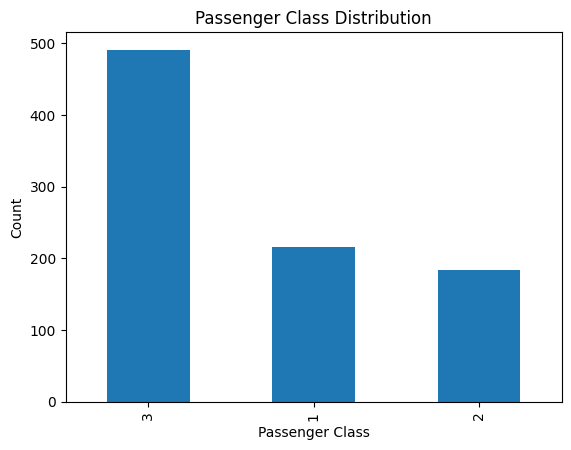

In [29]:
df["p_class"].value_counts().plot(kind="bar")
plt.title("Passenger Class Distribution")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


In [30]:
X = df.drop("survived", axis=1)
y = df["survived"]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [33]:
y_pred = model.predict(X_test)


In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



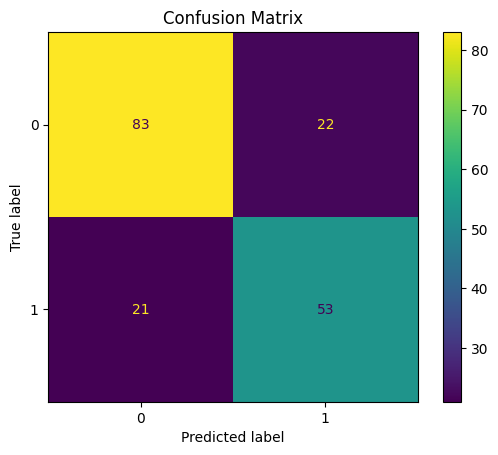

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [36]:
joblib.dump(model, "titanic_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model and encoder saved successfully!")


Model and encoder saved successfully!
